# `astroplan` Examples

## Can I observe this target tonight at Keck?

In [34]:
from astroplan import Observer, FixedTarget, get_site
from astroplan.plots import plot_airmass

from astropy.time import Time
import astropy.units as u
from astropy.coordinates import EarthLocation

# Use the name resolver from astropy's SkyCoord to create 
# a new target to observe tonight
target = FixedTarget.from_name('Vega')

# Choose the time to observe
time = Time('2016-07-21 10:00:00')

# Set the location of the observatory two equivalent ways: 
# (1) using `astropy.coordinates.EarthLocation`
longitude, latitude, elevation = -155.4783*u.deg, 19.8283*u.deg, 4160*u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)

# (2) or using astroplan's `get_site` function
location = get_site('Keck')

# Initialize an Observer object at that location
timezone = 'US/Hawaii'  # Set for timezone-aware time manipulations
keck = Observer(location=location, timezone=timezone)

# Can this target be seen by the telescopes, i.e., above ~30 degrees elevation?
horizon = 30*u.deg
target_is_visible = keck.can_see(time, target, horizon=horizon)

# Print result in a full sentence:
verb = "is" if target_is_visible else "is not"
print(("{target} {is_or_isnt} visible at time {time} for an observer "
       "at (lon, lat, elevation) =\n({location})").format(target=target.name, 
                                                          is_or_isnt=verb, 
                                                          time=time, 
                                                          location=location.to_geodetic()))

Vega is visible at time 2016-07-21 10:00:00.000 for an observer at (lon, lat, elevation) =
((<Longitude -155.47833333333332 deg>, <Latitude 19.828333333333326 deg>, <Quantity 4160.000000000752 m>))


In [33]:
# What time is the previously printed UTC time in local time?
local_time = keck.astropy_time_to_datetime(time)
print("{} [UTC] is equivalent to local {} time: {}".format(time, 
                                                             timezone, 
                                                             local_time))

2016-07-21 10:00:00.000 [UTC] is equivalent to local US/Hawaii time: 2016-07-21 00:00:00-10:00


In [42]:
# When did the target rise, when will it set? 
rise_time = keck.calc_rise(time, target, which='previous')
set_time = keck.calc_set(time, target, which='next')
print(("{name} rises: {rises}\n{name} sets: "
       "{sets}").format(name=target.name, 
                        rises=rise_time.iso, 
                        sets=set_time.iso))

Vega rises: 2016-07-21 01:54:55.648
Vega sets: 2016-07-21 16:07:26.516


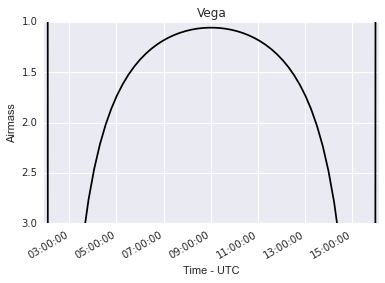

In [62]:
# Plot the airmass during the night:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('darkgrid')

ax = plot_airmass(target, keck, time)
ax.set(title=target.name,
       xlim=[rise_time.plot_date, set_time.plot_date])
plt.show()